In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf

In [2]:
from sklearn.model_selection import train_test_split

### Pré-Processamento e visualização das Imagens

In [3]:
def carregar_imagens(caminho, tamanho=(32,32)):
    imagens = []
    labels = []
    for pasta in os.listdir(caminho):
        classe = os.path.basename(pasta)
        for arquivo in os.listdir(os.path.join(caminho, pasta)):
            imagem = cv2.imread(os.path.join(caminho, pasta, arquivo))
            imagem = cv2.resize(imagem, tamanho)
            imagens.append(imagem)
            labels.append(classe)
    return np.array(imagens), np.array(labels)

In [3]:
caminho = "./dataset"
imagens, labels = carregar_imagens(caminho)

In [5]:
imagens_treino, imagens_teste, labels_treino, labels_teste = train_test_split(imagens, labels, test_size=0.2, random_state=42)

In [7]:
np.savez('dataset.npz', imagens_treino=imagens_treino, labels_treino=labels_treino, imagens_teste=imagens_teste, labels_teste=labels_teste)

### Carregando os Dados

In [3]:
data = np.load('dataset.npz')
imagens_treino = data['imagens_treino']
labels_treino = data['labels_treino']
imagens_teste = data['imagens_teste']
labels_teste = data['labels_teste']

In [4]:
nomes_classes = ['pessoas', 'passaros', 'cachorro']

In [30]:
def numberLabel(label):
    dados = {'pessoas': 0 , 'passaros': 1 , 'cachorro':2 }
    return dados[label]

In [28]:
def convert(label):
    dados = []
    for l in label:
        ele = numberLabel(l)
        dados.append(ele)
    return np.array(dados)    

In [7]:
print(imagens_teste)

[[[[209 157 117]
   [210 158 118]
   [207 158 118]
   ...
   [ 81  45  20]
   [203 148 103]
   [200 144  95]]

  [[209 157 117]
   [209 157 117]
   [207 158 118]
   ...
   [192 140  94]
   [203 148 103]
   [201 145  96]]

  [[209 157 117]
   [208 156 116]
   [209 157 117]
   ...
   [185 131  89]
   [206 148 110]
   [201 145  96]]

  ...

  [[197 141  92]
   [199 143  94]
   [201 145  96]
   ...
   [199 140  90]
   [196 137  87]
   [194 133  83]]

  [[200 141  92]
   [198 142  93]
   [200 144  95]
   ...
   [197 138  88]
   [197 136  86]
   [194 133  83]]

  [[196 141  90]
   [200 141  92]
   [198 142  93]
   ...
   [198 137  87]
   [196 135  85]
   [194 131  80]]]


 [[[189 173 156]
   [198 176 164]
   [201 186 174]
   ...
   [172 153 132]
   [165 146 125]
   [165 146 119]]

  [[201 186 170]
   [197 181 168]
   [187 171 154]
   ...
   [177 155 129]
   [175 155 129]
   [184 163 140]]

  [[180 160 137]
   [174 152 128]
   [158 137 111]
   ...
   [197 177 158]
   [196 176 158]
   [192 171

In [9]:
from PIL import Image

In [8]:
labels_teste.shape

(93,)

In [10]:
imagens_teste = imagens_teste / 255.0
imagens_treino = imagens_treino / 255.0

In [31]:
label_treino = convert(labels_treino)
label_teste = convert(labels_teste)


In [138]:
label_teste

array([1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1,
       1, 0, 0, 2, 0])

In [11]:
def visualiza_imagens(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

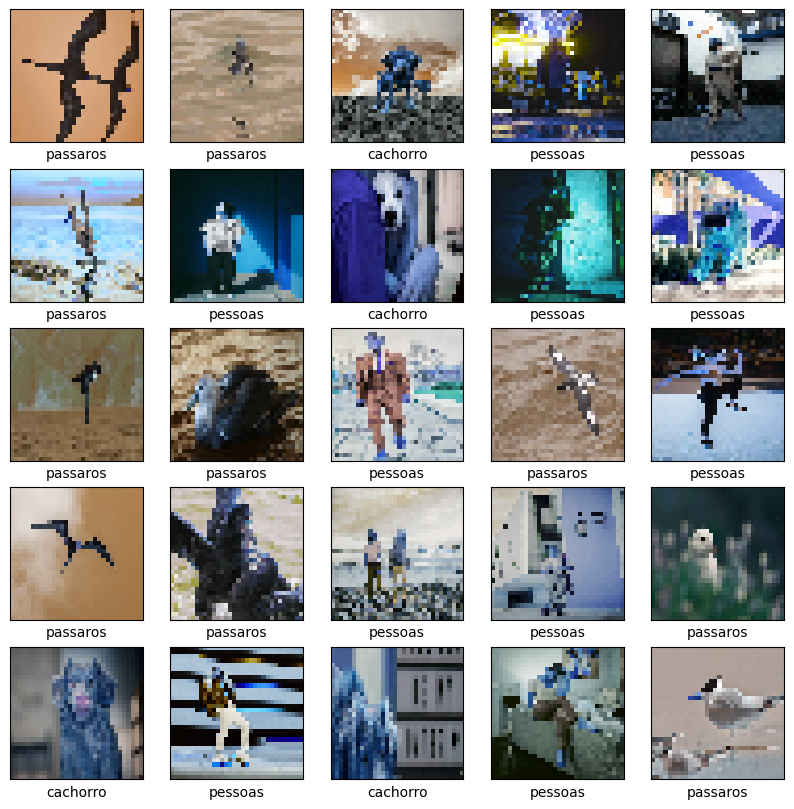

In [12]:
visualiza_imagens(imagens_teste, labels_teste)

### Construção do Modelo

In [59]:
# Modelo

# Criar o objeto de sequência de camadas
modelo = models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
modelo.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3))) # (32,32) é os pixel da imagem e o 3 é o rgb
modelo.add(layers.MaxPooling2D((2,2)))

# Adicionando o segundo bloco de convolução e max pooling (camada intermediária)
modelo.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
modelo.add(layers.MaxPooling2D((2,2)))

modelo.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
modelo.add(layers.MaxPooling2D((2,2)))

modelo.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
modelo.add(layers.MaxPooling2D((2,2)))




In [60]:
modelo.add(layers.Flatten())
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dense(3, activation='softmax'))

In [61]:
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,891 (429.26 KB)

 Trainable params: 109,891 (429.26 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [109]:
%%time
history = modelo.fit(imagens_treino,
                    label_treino,
                    epochs=80,
                    validation_data=(imagens_teste, label_teste))

Epoch 1/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 9.2613e-05 - val_accuracy: 0.7312 - val_loss: 1.7928
Epoch 2/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 8.4953e-05 - val_accuracy: 0.7312 - val_loss: 1.7982
Epoch 3/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 7.2106e-05 - val_accuracy: 0.7419 - val_loss: 1.8043
Epoch 4/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 8.5146e-05 - val_accuracy: 0.7312 - val_loss: 1.7986
Epoch 5/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 6.8662e-05 - val_accuracy: 0.7419 - val_loss: 1.8170
Epoch 6/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 7.9239e-05 - val_accuracy: 0.7312 - val_loss: 1.8100
Epoch 7/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 7.2962e-05 - val_accuracy: 0.7312 - val_loss: 1.8099
Epoch 8/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 6.770

### Avaliação do Modelo

In [110]:
def prever(predict):
    classe_prevista = np.argmax(predict)
    return nomes_classes[classe_prevista]

In [111]:
erro_teste, acc_teste = modelo.evaluate(imagens_teste, label_teste, verbose = 2)

3/3 - 0s - 13ms/step - accuracy: 0.7312 - loss: 2.0481


In [112]:
print('\nAcurácia com Dados de Teste:', acc_teste)


Acurácia com Dados de Teste: 0.7311828136444092


In [121]:
imagem_verifica = Image.open("../c01.webp")

In [122]:
imagem_verifica.size

(774, 516)

In [123]:
imagem_verifica = imagem_verifica.resize((32,32))

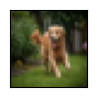

In [124]:
plt.figure(figsize = (1,1))
plt.imshow(imagem_verifica)
plt.xticks([])
plt.yticks([])
plt.show()

In [125]:
imagem_verifica.size

(32, 32)

In [126]:
imagem_verifica_np = np.array(imagem_verifica) / 255.0

In [127]:
imagem_verifica_np = np.expand_dims(imagem_verifica_np, axis=0)

In [133]:
predict = modelo.predict(imagem_verifica_np)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [134]:
print(predict)

[[1.4354268e-14 1.0000000e+00 5.7828746e-17]]


In [135]:
predict

array([[1.4354268e-14, 1.0000000e+00, 5.7828746e-17]], dtype=float32)

In [136]:
print(prever(predict))

passaros


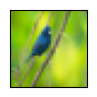

(32, 32)


In [130]:
imagem_verifica = Image.open("../p01.webp")
imagem_verifica = imagem_verifica.resize((32,32))
plt.figure(figsize = (1,1))
plt.imshow(imagem_verifica)
plt.xticks([])
plt.yticks([])
plt.show()
print(imagem_verifica.size)
imagem_verifica_np = np.array(imagem_verifica) / 255.0
imagem_verifica_np = np.expand_dims(imagem_verifica_np, axis=0)

In [131]:
predict = modelo.predict(imagem_verifica_np)
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[1.4354268e-14 1.0000000e+00 5.7828746e-17]]


In [132]:
print(prever(predict))

passaros
